In [30]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import missingno as msno # pour avoir la visualisation des valeurs manquantes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
cars = pd.read_csv('D:/WebScraping/data_cars.csv', sep=";")
cars.head(5)

,model,year,mileage,engine_type,price,gearbox,brand
0,Citroën C3,2019,128 279 km,Diesel,10 395 €,Manuelle,BlueHDi 100 S&S BVM5 Feel
1,Citroën C3,2021,15 656 km,Essence,15 270 €,Manuelle,PureTech 83 S&S BVM5 Shine
2,Peugeot 208,2017,71 785 km,Essence,9 990 €,Manuelle,1.2 PureTech 82ch BVM5 Style
3,Peugeot 2008,2016,98 465 km,Essence,11 990 €,Manuelle,1.2 PureTech 110ch S&S BVM5 Allure
4,Peugeot 308,2023,14 599 km,Essence,25 989 €,Automatique,PureTech 130ch S&S EAT8 Allure Pack


In [33]:
cars.tail(5)

,model,year,mileage,engine_type,price,gearbox,brand
7209,Peugeot 108,2016,83 110 km,Essence,10 990 €,Manuelle,1.0 e-VTi Allure 5p
7210,Citroën C5 Aircross,2023,10 990 km,Diesel,32 988 €,Automatique,BlueHDi 130ch S&S Shine Pack EAT8
7211,Citroën C3,2023,20 063 km,Essence,16 280 €,Manuelle,1.2 PureTech 83ch S&S Shine
7212,Peugeot 2008,2019,55 851 km,Essence,19 990 €,Manuelle,1.2 PureTech 130ch E6.c GT Line S&S
7213,Citroën C3 Aircross,2019,15 466 km,Essence,15 780 €,Manuelle,PureTech 110ch S&S Feel E6.d 6cv


<Axes: >

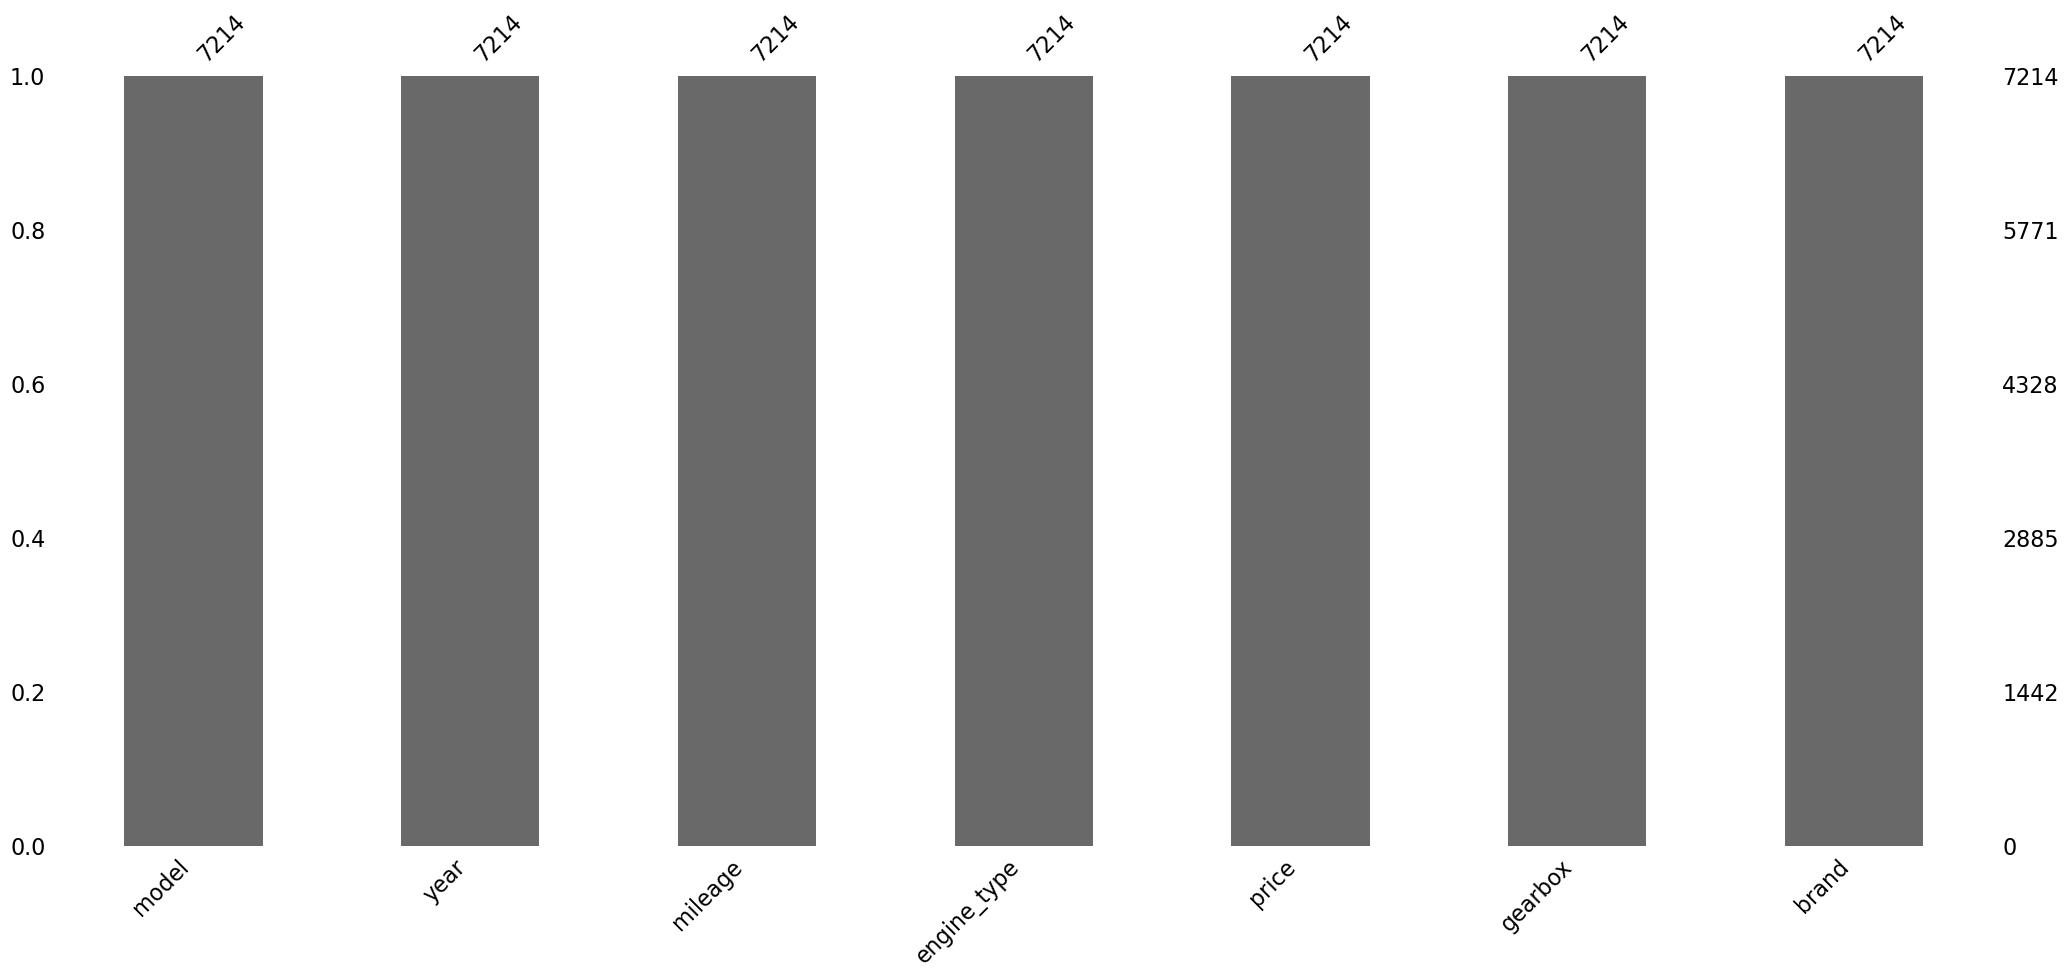

In [34]:
msno.bar(cars)

In [35]:
cars.columns

Index(['model', 'year', 'mileage', 'engine_type', 'price', 'gearbox', 'brand'], dtype='object')

In [36]:
category_col = [
    "model",
    "year",
    "mileage",
    "engine_type",
    "price",
    "gearbox",
    "brand",
    
]

for column in category_col:
    print(cars[column].value_counts())
    print("#" * 40)

model
Peugeot 3008           1024
Citroën C5 Aircross     733
Citroën C3              654
Peugeot 208             631
Peugeot 2008            565
                       ... 
Kia Rio                   1
Kia EV6                   1
MG EHS                    1
Volkswagen Up!            1
Ford B-Max                1
Name: count, Length: 144, dtype: int64
########################################
year
2023    4241
2022    1049
2020     619
2021     565
2019     401
2018     182
2017      80
2016      47
2015      21
2013       5
2014       3
2024       1
Name: count, dtype: int64
########################################
mileage
5 km         1030
1 km          132
10 km          52
2 km           33
4 km           24
             ... 
3 298 km        1
24 770 km       1
7 201 km        1
68 300 km       1
15 466 km       1
Name: count, Length: 3793, dtype: int64
########################################
engine_type
Essence                 3854
Diesel                  1736
Hybride rechargeable 

Petite Analyse de la cellule du dessus : 

- La plupart des voitures vendues ont un moteur Essence.
- 4756 voitures à transmission automatique sont disponibles à l'achat.
- Les années des voitures vont de 2013 à 2024.

In [37]:
cars.query("mileage == '0.0'")['mileage'].count()

0

In [38]:
cars.dtypes

model          object
year            int64
mileage        object
engine_type    object
price          object
gearbox        object
brand          object
dtype: object

In [40]:
cars['mileage'] = cars['mileage'].astype(str).str.replace(' km', '').str.replace(' ', '').astype(int)
cars['price'] = cars['price'].astype(str).str.replace(' €', '').str.replace(' ', '').astype(int)

In [41]:
cars.head()

,model,year,mileage,engine_type,price,gearbox,brand
0,Citroën C3,2019,128279,Diesel,10395,Manuelle,BlueHDi 100 S&S BVM5 Feel
1,Citroën C3,2021,15656,Essence,15270,Manuelle,PureTech 83 S&S BVM5 Shine
2,Peugeot 208,2017,71785,Essence,9990,Manuelle,1.2 PureTech 82ch BVM5 Style
3,Peugeot 2008,2016,98465,Essence,11990,Manuelle,1.2 PureTech 110ch S&S BVM5 Allure
4,Peugeot 308,2023,14599,Essence,25989,Automatique,PureTech 130ch S&S EAT8 Allure Pack


In [42]:
#La conversion vers le type de données "catégorie" est souvent utilisée pour les variables catégorielles
cars["engine_type"] = cars["engine_type"].astype("category")
cars["gearbox"] = cars["gearbox"].astype("category")

cars["mileage"] = cars["mileage"].astype(float)

In [44]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7214.0,2021.946077,1.627438,2013.0,2021.0,2023.0,2023.00,2024.0
mileage,7214.0,19884.133213,27131.279637,1.0,2470.0,8887.0,23987.25,169991.0
price,7214.0,29412.481286,10798.693411,7470.0,20490.0,29990.0,35641.50,93990.0


In [45]:
#Avoir l'age de la voiture 
cars['Current_year']=2024
cars['Age_voiture']=cars['Current_year']-cars['year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,model,year,mileage,engine_type,price,gearbox,brand,Age_voiture
0,Citroën C3,2019,128279.0,Diesel,10395,Manuelle,BlueHDi 100 S&S BVM5 Feel,5
1,Citroën C3,2021,15656.0,Essence,15270,Manuelle,PureTech 83 S&S BVM5 Shine,3
2,Peugeot 208,2017,71785.0,Essence,9990,Manuelle,1.2 PureTech 82ch BVM5 Style,7
3,Peugeot 2008,2016,98465.0,Essence,11990,Manuelle,1.2 PureTech 110ch S&S BVM5 Allure,8
4,Peugeot 308,2023,14599.0,Essence,25989,Automatique,PureTech 130ch S&S EAT8 Allure Pack,1


* Séparation de la marque du véhicule avec le modèle *

In [67]:
brand_model_split = cars['model'].str.split(' ', n=1, expand=True)

cars['Marque_vehicule'] = brand_model_split[0]  
cars['Model_version'] = brand_model_split[1]  

cars

,model,year,mileage,engine_type,price,gearbox,brand,Age_voiture,Marque_vehicule,Model_version
0,Citroën C3,2019,128279.0,Diesel,10395,Manuelle,BlueHDi 100 S&S BVM5 Feel,5,Citroën,C3
1,Citroën C3,2021,15656.0,Essence,15270,Manuelle,PureTech 83 S&S BVM5 Shine,3,Citroën,C3
2,Peugeot 208,2017,71785.0,Essence,9990,Manuelle,1.2 PureTech 82ch BVM5 Style,7,Peugeot,208
3,Peugeot 2008,2016,98465.0,Essence,11990,Manuelle,1.2 PureTech 110ch S&S BVM5 Allure,8,Peugeot,2008
4,Peugeot 308,2023,14599.0,Essence,25989,Automatique,PureTech 130ch S&S EAT8 Allure Pack,1,Peugeot,308
...,...,...,...,...,...,...,...,...,...,...
7209,Peugeot 108,2016,83110.0,Essence,10990,Manuelle,1.0 e-VTi Allure 5p,8,Peugeot,108
7210,Citroën C5 Aircross,2023,10990.0,Diesel,32988,Automatique,BlueHDi 130ch S&S Shine Pack EAT8,1,Citroën,C5 Aircross
7211,Citroën C3,2023,20063.0,Essence,16280,Manuelle,1.2 PureTech 83ch S&S Shine,1,Citroën,C3
7212,Peugeot 2008,2019,55851.0,Essence,19990,Manuelle,1.2 PureTech 130ch E6.c GT Line S&S,5,Peugeot,2008


In [68]:
cars.Model_version.unique()

array(['C3', '208', '2008', '308', 'C3 Aircross', '5008', '3008', 'C4',
       '4', '408', '3', 'C5 Aircross', '508', '7', 'C5 X', 'Berlingo',
       '500', 'C4 X', 'Partner', 'Expert', 'Jumpy', '108', 'Crossland',
       'Corsa', '9', 'Mokka', 'Grandland', '500X', 'Talisman', 'Rifter',
       'Rav4', 'Swift', 'Arkana', 'C4 Cactus', 'Koleos', 'Serie 1',
       'Captur', 'XC60', 'Renegade', 'Ignis', 'Ion', 'X-Trail', 'Fiesta',
       'I20', 'C-HR', 'Espace', 'Clio', 'Sandero', 'Kangoo', 'Twingo',
       'Passat', 'C4 Grand SpaceTourer', 'EHS', 'One', 'Megane', 'Rio',
       'ID3', 'Panda', 'Duster', 'Sportage', 'X3', 'Kuga', 'V40',
       'Enyaq iV', 'T-Roc', 'Qashqai', 'Ecosport', 'Touran', 'Scenic',
       'Puma', '308 SW', 'Classe A', 'C1', 'Corolla', 'Classe B',
       'T-Cross', 'CT', 'A6', 'Kona', 'Polo', 'C-Zero', 'Golf', 'GLA',
       'Spring', 'Romeo Stelvio', 'Leon', 'CX-5', 'Yaris', 'Kadjar',
       'Ibiza', 'Spacetourer', 'CLA', 'Astra', 'Stonic', 'Xceed', 'Boxer',
       '5

In [69]:
cars.Marque_vehicule.unique()

array(['Citroën', 'Peugeot', 'DS', 'Fiat', 'Opel', 'Renault', 'Toyota',
       'Suzuki', 'BMW', 'Volvo', 'Jeep', 'Nissan', 'Ford', 'Hyundai',
       'Dacia', 'Volkswagen', 'MG', 'Mini', 'Kia', 'Skoda', 'Mercedes',
       'Lexus', 'Audi', 'Alfa', 'Seat', 'Mazda', 'Land', 'Abarth',
       'Jaguar'], dtype=object)

In [70]:
cars.Marque_vehicule.nunique()

29

In [57]:
cars.groupby(cars.Marque_vehicule).size().sort_values(ascending =False)

Marque_vehicule
Peugeot       3679
Citroën       2512
DS             664
Opel           108
Renault         61
Fiat            37
Volkswagen      20
Mercedes        16
Ford            16
Nissan          13
Dacia           11
Toyota          11
Kia              9
BMW              9
Volvo            6
Hyundai          6
Audi             6
Alfa             5
Mini             5
Jeep             5
Skoda            3
Seat             3
Suzuki           2
Mazda            2
Abarth           1
MG               1
Land             1
Jaguar           1
Lexus            1
dtype: int64

- On peut voir ci-dessus que Peugeot et Citroen sont les marques qui sont les plus mis en ventes sur Spoticar.com

In [71]:
cars.groupby('Model_version')['Model_version'].size().nlargest(30)

Model_version
3008                    1024
C5 Aircross              733
C3                       654
208                      631
2008                     565
308                      492
5008                     426
C5 X                     333
C4                       307
3                        290
508                      255
4                        188
7                        164
C4 X                     164
C3 Aircross              136
408                      120
Berlingo                  81
Partner                   67
Jumpy                     41
Corsa                     39
Crossland                 32
Expert                    31
308 SW                    23
500                       22
9                         20
C4 Cactus                 20
108                       19
Mokka                     19
C4 Grand SpaceTourer      17
Captur                    17
Name: Model_version, dtype: int64

- Le modèle le plus apprécié est le 3008 de Peugeot

In [72]:
cars.describe()

,year,mileage,price,Age_voiture
count,7214.000000,7214.000000,7214.000000,7214.000000
mean,2021.946077,19884.133213,29412.481286,2.053923
std,1.627438,27131.279637,10798.693411,1.627438
min,2013.000000,1.000000,7470.000000,0.000000
25%,2021.000000,2470.000000,20490.000000,1.000000
50%,2023.000000,8887.000000,29990.000000,1.000000
75%,2023.000000,23987.250000,35641.500000,3.000000
max,2024.000000,169991.000000,93990.000000,11.000000


C:\Users\Youssef\AppData\Local\Temp\ipykernel_12480\2673325834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[variable],kde=False,color='blue')
C:\Users\Youssef\AppData\Local\Temp\ipykernel_12480\2673325834.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


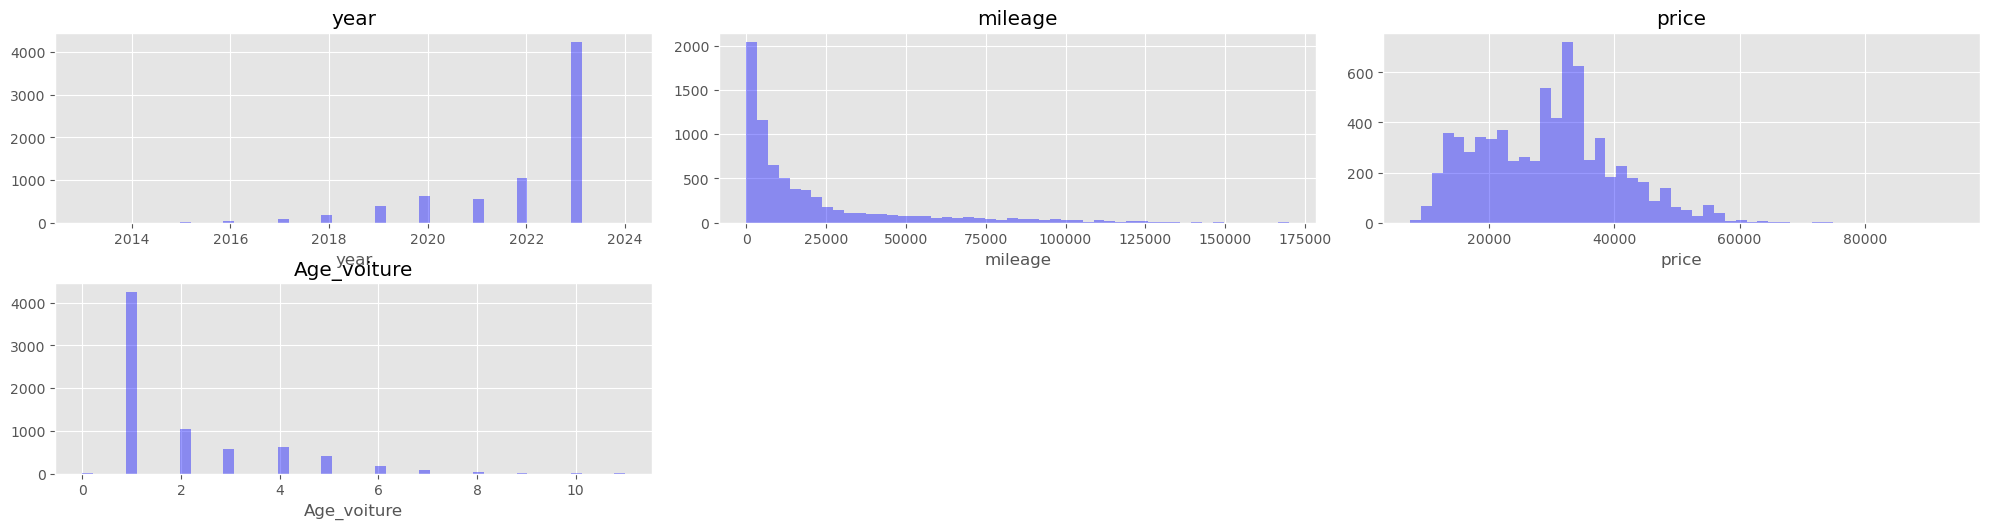

In [73]:
plt.style.use('ggplot')
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

In [74]:
cars

,model,year,mileage,engine_type,price,gearbox,brand,Age_voiture,Marque_vehicule,Model_version
0,Citroën C3,2019,128279.0,Diesel,10395,Manuelle,BlueHDi 100 S&S BVM5 Feel,5,Citroën,C3
1,Citroën C3,2021,15656.0,Essence,15270,Manuelle,PureTech 83 S&S BVM5 Shine,3,Citroën,C3
2,Peugeot 208,2017,71785.0,Essence,9990,Manuelle,1.2 PureTech 82ch BVM5 Style,7,Peugeot,208
3,Peugeot 2008,2016,98465.0,Essence,11990,Manuelle,1.2 PureTech 110ch S&S BVM5 Allure,8,Peugeot,2008
4,Peugeot 308,2023,14599.0,Essence,25989,Automatique,PureTech 130ch S&S EAT8 Allure Pack,1,Peugeot,308
...,...,...,...,...,...,...,...,...,...,...
7209,Peugeot 108,2016,83110.0,Essence,10990,Manuelle,1.0 e-VTi Allure 5p,8,Peugeot,108
7210,Citroën C5 Aircross,2023,10990.0,Diesel,32988,Automatique,BlueHDi 130ch S&S Shine Pack EAT8,1,Citroën,C5 Aircross
7211,Citroën C3,2023,20063.0,Essence,16280,Manuelle,1.2 PureTech 83ch S&S Shine,1,Citroën,C3
7212,Peugeot 2008,2019,55851.0,Essence,19990,Manuelle,1.2 PureTech 130ch E6.c GT Line S&S,5,Peugeot,2008


Mean Squared Error (MSE) : 73885240.48359326
Root Mean Squared Error (RMSE) : 8595.65241756513
Coefficient of Determination (R^2) : 0.35435681883683456

Coefficients du modèle :
          Coefficient
year     2837.011122
mileage    -0.086166
Intercept du modèle : -5705166.16842496


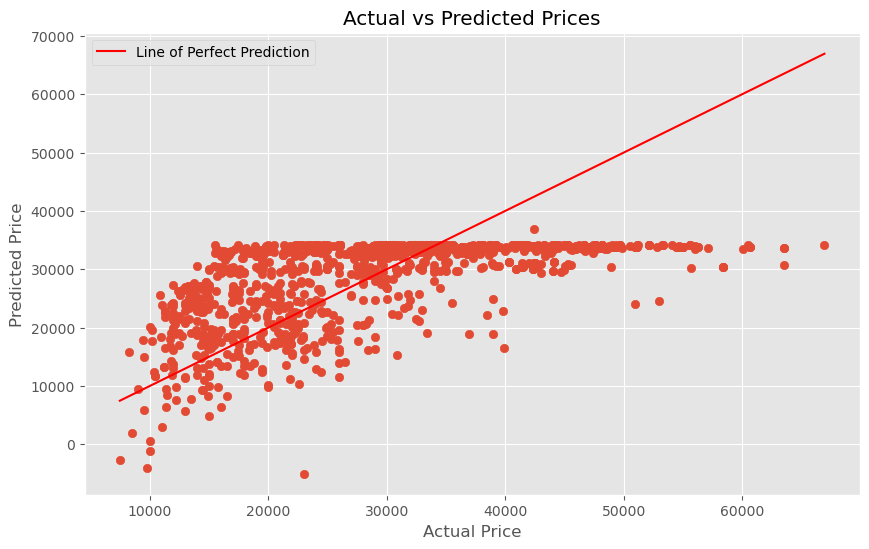

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = cars[['year', 'mileage']]
y = cars['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("Coefficient of Determination (R^2) :", r2)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients du modèle :\n", coefficients)
print("Intercept du modèle :", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Line of Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()